# Creating a quantum circuit
1) Two parameters, named "input1" and "weight1", are created. These parameters are placeholders for numerical values that can be set later.
2) A quantum circuit with a single qubit is initialized.
3) qc1.h(0) adds a Hadamard gate to the first qubit (qubit 0). The Hadamard gate creates a superposition state.
4) qc1.ry(params1[0], 0) adds a parameterized rotation around the Y-axis to qubit 0. The rotation angle is given by the parameter "input1"
5) qc1.rx(params1[1], 0) adds a parameterized rotation around the X-axis to qubit 0. The rotation angle is given by the parameter "weight1".
6) The circuit is drawn using the Matplotlib library, with a style optimized for Clifford gates.

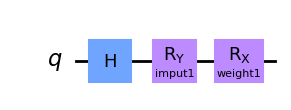

In [1]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("imput1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl", style="clifford")

# Creating an Observable

1) SparsePauliOp is a class in Qiskit for representing operators (such as observables) that are sums of Pauli operators.
2) SparsePauliOp.from_list is a method that creates a SparsePauliOp from a list of Pauli strings and coefficients.
3) qc1.num_qubits returns the number of qubits in the quantum circuit qc1 (which is 1 in this case)
4) "Y" * qc1.num_qubits generates a string of Y repeated for each qubit in the circuit. For a single-qubit circuit, this results in the string "Y"
5) ( "Y", 1 ): This tuple indicates a Pauli-Y operator acting on the qubit with a coefficient of 1.

In [2]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

# Creating a quantum neural network 

1) EstimatorQNN is a class in Qiskit Machine Learning that represents a quantum neural network based on an estimator.
2) qci is the quantum circuit and an Observable1 which are created before are feed into the EstimatorQNN
3) This specifies that the parameter "imput1" (the first parameter in params1) is treated as an input parameter for the QNN. Input parameters are those that are fed into the network as part of the input data.
4) This specifies that the parameter "weight1" (the second parameter in params1) is treated as a weight parameter for the QNN. Weight parameters are those that are optimized during the training process.

In [3]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn = EstimatorQNN(
    circuit=qc1, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]]
)
estimator_qnn

# SimplerQnn

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


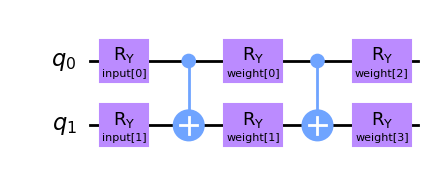

In [5]:
from qiskit.circuit import ParameterVector


#this line says taht we are creating 2 input parameters 
inputs2 = ParameterVector("input", 2)
#this line says taht we are creating 4 weight parameters 
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")


#creating a simplerQnn with 2 qubits
#this circuit does not need any observable because the 
qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw("mpl", style="clifford")

In [16]:
from qiskit_machine_learning.neural_networks import SamplerQNN

sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2)
sampler_qnn

# EstimatorQnn

In [14]:
from qiskit_algorithms.utils import algorithm_globals

estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

In [15]:
print(
    f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}"
)
print(
    f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}"
)

Number of input features for EstimatorQNN: 1 
Input: [0.89344105]
Number of trainable weights for EstimatorQNN: 1 
Weights: [0.71457062]


In [19]:
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Forward pass result for EstimatorQNN: [[0.51062602]]. 
Shape: (1, 1)


In [17]:
sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)

In [18]:
print(
    f"Number of input features for SamplerQNN: {sampler_qnn.num_inputs} \nInput: {sampler_qnn_input}"
)
print(
    f"Number of trainable weights for SamplerQNN: {sampler_qnn.num_weights} \nWeights: {sampler_qnn_weights}"
)

Number of input features for SamplerQNN: 2 
Input: [0.79447342 0.15786762]
Number of trainable weights for SamplerQNN: 4 
Weights: [0.21843202 0.42797751 0.48393645 0.72241305]


In [20]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_input, sampler_qnn_weights)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}"
)

Forward pass result for SamplerQNN: [[0.40649452 0.28762887 0.21234252 0.09353409]].  
Shape: (1, 4)


In [21]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_input, sampler_qnn_weights)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}"
)

Forward pass result for SamplerQNN: [[0.40649452 0.28762887 0.21234252 0.09353409]].  
Shape: (1, 4)


In [22]:
estimator_qnn_forward_batched = estimator_qnn.forward(
    [estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights
)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}"
)

Forward pass result for EstimatorQNN: [[0.51062602]
 [0.51062602]].  
Shape: (2, 1)


In [23]:
sampler_qnn_forward_batched = sampler_qnn.forward(
    [sampler_qnn_input, sampler_qnn_input], sampler_qnn_weights
)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward_batched}.  \nShape: {sampler_qnn_forward_batched.shape}"
)

Forward pass result for SamplerQNN: [[0.40649452 0.28762887 0.21234252 0.09353409]
 [0.40649452 0.28762887 0.21234252 0.09353409]].  
Shape: (2, 4)


In [24]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: None.  
Shape: None
Weight gradients for EstimatorQNN: [[[0.58861286]]].  
Shape: (1, 1, 1)


In [25]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: None.  
Shape: None
Weight gradients for SamplerQNN: [[[ 0.07980247 -0.3507819  -0.34193502 -0.29379596]
  [-0.04068244  0.03020317  0.34193502 -0.16402166]
  [-0.27858642  0.37504339 -0.14093     0.29379596]
  [ 0.23946639 -0.05446465  0.14093     0.16402166]]].  
Shape: (1, 4, 4)


In [26]:
estimator_qnn.input_gradients = True
sampler_qnn.input_gradients = True

In [27]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: [[[0.41069473]]].  
Shape: (1, 1, 1)
Weight gradients for EstimatorQNN: [[[0.58861286]]].  
Shape: (1, 1, 1)


In [28]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: [[[-0.29619287 -0.37034175]
  [ 0.43355853 -0.06912599]
  [-0.1622779   0.27431621]
  [ 0.02491224  0.16515153]]].  
Shape: (1, 4, 2)
Weight gradients for SamplerQNN: [[[ 0.07980247 -0.3507819  -0.34193502 -0.29379596]
  [-0.04068244  0.03020317  0.34193502 -0.16402166]
  [-0.27858642  0.37504339 -0.14093     0.29379596]
  [ 0.23946639 -0.05446465  0.14093     0.16402166]]].  
Shape: (1, 4, 4)


In [29]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

estimator_qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1]],
)

In [30]:
estimator_qnn_forward2 = estimator_qnn2.forward(estimator_qnn_input, estimator_qnn_weights)
estimator_qnn_input_grad2, estimator_qnn_weight_grad2 = estimator_qnn2.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(f"Forward output for EstimatorQNN1: {estimator_qnn_forward.shape}")
print(f"Forward output for EstimatorQNN2: {estimator_qnn_forward2.shape}")
print(f"Backward output for EstimatorQNN1: {estimator_qnn_weight_grad.shape}")
print(f"Backward output for EstimatorQNN2: {estimator_qnn_weight_grad2.shape}")

Forward output for EstimatorQNN1: (1, 1)
Forward output for EstimatorQNN2: (1, 2)
Backward output for EstimatorQNN1: (1, 1, 1)
Backward output for EstimatorQNN2: (1, 2, 1)


In [31]:
parity = lambda x: "{:b}".format(x).count("1") % 2
output_shape = 2  # parity = 0, 1

sampler_qnn2 = SamplerQNN(
    circuit=qc2,
    input_params=inputs2,
    weight_params=weights2,
    interpret=parity,
    output_shape=output_shape,
)

In [32]:
sampler_qnn_forward2 = sampler_qnn2.forward(sampler_qnn_input, sampler_qnn_weights)
sampler_qnn_input_grad2, sampler_qnn_weight_grad2 = sampler_qnn2.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(f"Forward output for SamplerQNN1: {sampler_qnn_forward.shape}")
print(f"Forward output for SamplerQNN2: {sampler_qnn_forward2.shape}")
print(f"Backward output for SamplerQNN1: {sampler_qnn_weight_grad.shape}")
print(f"Backward output for SamplerQNN2: {sampler_qnn_weight_grad2.shape}")

Forward output for SamplerQNN1: (1, 4)
Forward output for SamplerQNN2: (1, 2)
Backward output for SamplerQNN1: (1, 4, 4)
Backward output for SamplerQNN2: (1, 2, 4)
